In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, entropy

In [322]:
# read the files datasets/dataset_train.csv
df = pd.read_csv('datasets/dataset_train.csv')

In [323]:
def ft_count(L):
	tot = 0
	for l in L:
		if not np.isnan(l):
			tot += 1
	return tot

In [324]:
def ft_sum(L):
	tot = 0
	for l in L:
		if not np.isnan(l):
			tot += l
	return tot

In [325]:
def ft_mean(L):
	count = ft_count(L)
	if count == 0:
		return np.nan
	return ft_sum(L) / ft_count(L)

In [326]:
def ft_std(L, ddof=0):
	mean = ft_mean(L)
	if np.isnan(mean):
		return np.nan
	tot = 0
	count = 0
	for l in L:
		if not np.isnan(l):
			tot += (l - mean)**2
			count += 1
	return (tot/(count - ddof))**0.5

In [327]:
def ft_max(L):
	maxi = None
	for l in L:
		if not np.isnan(l):
			if maxi is None or l > maxi:
				maxi = l
	return maxi

In [328]:
def ft_min(L):
	mini = None
	for l in L:
		if not np.isnan(l):
			if mini is None or l < mini:
				mini = l
	return mini

In [329]:
def ft_percentile(L, p):
	L = sorted([l for l in L if not np.isnan(l)])
	if len(L) == 0:
		return np.nan
	if p < 0 or p > 1:
		return np.nan
	index = (len(L) - 1) * p
	if index.is_integer():
		return L[int(index)]
	else:
		return (L[int(index)] * (1 - index % 1) + L[int(index) + 1] * (index % 1))

In [330]:
print(df["Arithmancy"].count())
print(ft_count(df["Arithmancy"]))

1566
1566


In [331]:
print(df["Arithmancy"].mean())
print(ft_mean(df["Arithmancy"].to_list()))

49634.57024265645
49634.57024265645


In [332]:
print(df["Arithmancy"].std(ddof=0))
print(ft_std(df["Arithmancy"].to_list(), ddof=0))

16674.47957652662
16674.47957652662


In [333]:
print(df["Arithmancy"].max())
print(ft_max(df["Arithmancy"].to_list()))

104956.0
104956.0


In [334]:
print(df["Arithmancy"].min())
print(ft_min(df["Arithmancy"].to_list()))

-24370.0
-24370.0


In [335]:
print(df["Arithmancy"].quantile(0.25))
print(ft_percentile(df["Arithmancy"].to_list(), 0.25))

38511.5
38511.5


In [336]:
print(df["Arithmancy"].quantile(0.5))
print(ft_percentile(df["Arithmancy"].to_list(), 0.5))

49013.5
49013.5


In [337]:
print(df["Arithmancy"].quantile(0.75))
print(ft_percentile(df["Arithmancy"].to_list(), 0.75))

60811.25
60811.25


In [338]:
courses = ["Arithmancy", "Astronomy", "Herbology", "Defense Against the Dark Arts", "Divination", "Muggle Studies", "Ancient Runes", "History of Magic", "Transfiguration", "Potions", "Care of Magical Creatures", "Charms", "Flying"]
hogwarts_House = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"]
colors_dict = {"Gryffindor": "red", "Hufflepuff": "yellow", "Ravenclaw": "blue", "Slytherin": "green"}

In [339]:
def describe(filename):
	# Read the CSV file
	df = pd.read_csv(filename)
	
	if df.columns[0] == 'Index':
		df = df.drop(columns=[df.columns[0]])



	# Get numerical columns only
	num_cols = df.select_dtypes(include=['float64', 'int64']).columns
	
	# Create empty lists to store results
	stats = []
	
	# Calculate statistics for each column
	for col in num_cols:
		values = df[col].to_list()
		col_stats = {
			'Feature': col,
			'Count': ft_count(values),
			'Mean': ft_mean(values),
			'Std': ft_std(values),
			'Min': ft_min(values),
			'25%': ft_percentile(values, 0.25),
			'50%': ft_percentile(values, 0.50),
			'75%': ft_percentile(values, 0.75),
			'Max': ft_max(values)
		}
		stats.append(col_stats)
	
	# Convert to DataFrame for nice display
	result = pd.DataFrame(stats)
	result = result.set_index('Feature')
	
	# Display with proper formatting
	pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
	return result

# Usage example:
describe('datasets/dataset_train.csv')

Count         Mean          Std           Min  \
Feature                                                                        
Arithmancy                      1566 49634.570243 16674.479577 -24370.000000   
Astronomy                       1568    39.797131   520.132330   -966.740546   
Herbology                       1567     1.141020     5.218016    -10.295663   
Defense Against the Dark Arts   1569    -0.387863     5.211132    -10.162119   
Divination                      1561     3.153910     4.153970     -8.727000   
Muggle Studies                  1565  -224.589915   486.189433  -1086.496835   
Ancient Runes                   1565   495.747970   106.251202    283.869609   
History of Magic                1557     2.963095     4.424353     -8.858993   
Transfiguration                 1566  1030.096946    44.111025    906.627320   
Potions                         1570     5.950373     3.146852     -4.697484   
Care of Magical Creatures       1560    -0.053427     0.971146     -3.313676   
Charms                          1600  -243.374409     8.780895   -261.048920   
Flying                          1600    21.958012    97.601087   -181.470000   

                                       25%          50%          75%  \
Feature                                                                
Arithmancy                    38511.500000 49013.500000 60811.250000   
Astronomy                      -489.551387   260.289446   524.771949   
Herbology                        -4.308182     3.469012     5.419183   
Defense Against the Dark Arts    -5.259095    -2.589342     4.904680   
Divination                        3.099000     4.624000     5.667000   
Muggle Studies                 -577.580096  -419.164294   254.994857   
Ancient Runes                   397.511047   463.918305   597.492230   
History of Magic                  2.218653     4.378176     5.825242   
Transfiguration                1026.209993  1045.506996  1058.436410   
Potions                           3.646785     5.874837     8.248173   
Care of Magical Creatures        -0.671606    -0.044811     0.589919   
Charms                         -250.652600  -244.867765  -232.552305   
Flying                          -41.870000    -2.515000    50.560000   

                                        Max  
Feature                                      
Arithmancy                    104956.000000  
Astronomy                       1016.211940  
Herbology                         11.612895  
Defense Against the Dark Arts      9.667405  
Divination                        10.032000  
Muggle Studies                  1092.388611  
Ancient Runes                    745.396220  
History of Magic                  11.889713  
Transfiguration                 1098.958201  
Potions                           13.536762  
Care of Magical Creatures          3.056546  
Charms                          -225.428140  
Flying                           279.070000

In [340]:
(df[df["Hogwarts House"] == "Hufflepuff"]["Best Hand"] == "Right").sum()

np.int64(266)

In [341]:
df

Index Hogwarts House First Name    Last Name    Birthday Best Hand  \
0         0      Ravenclaw     Tamara          Hsu  2000-03-30      Left   
1         1      Slytherin      Erich      Paredes  1999-10-14     Right   
2         2      Ravenclaw   Stephany        Braun  1999-11-03      Left   
3         3     Gryffindor      Vesta    Mcmichael  2000-08-19      Left   
4         4     Gryffindor     Gaston        Gibbs  1998-09-27      Left   
...     ...            ...        ...          ...         ...       ...   
1595   1595     Gryffindor       Jung        Blank  2001-09-14     Right   
1596   1596      Slytherin     Shelli         Lock  1998-03-12      Left   
1597   1597     Gryffindor   Benjamin  Christensen  1999-10-24     Right   
1598   1598     Hufflepuff  Charlotte       Dillon  2001-09-21      Left   
1599   1599     Hufflepuff      Kylie        Nowak  2000-08-21      Left   

       Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0    58384.000000 -487.886086   5.727180                       4.878861   
1    67239.000000 -552.060507  -5.987446                       5.520605   
2    23702.000000 -366.076117   7.725017                       3.660761   
3    32667.000000  697.742809  -6.497214                      -6.977428   
4    60158.000000  436.775204  -7.820623                            NaN   
...           ...         ...        ...                            ...   
1595 49009.000000  354.280086  -4.541837                      -3.542801   
1596 63296.000000  367.531174   6.061064                      -3.675312   
1597 63905.000000  544.018925  -3.203269                      -5.440189   
1598 82713.000000  453.676219   3.442831                      -4.536762   
1599 48639.000000  688.911989   5.421046                      -6.889120   

      Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722000      272.035831     532.484226          5.231058   
1      -5.612000     -487.340557     367.760303          4.107170   
2       6.140000      664.893521     602.585284          3.555579   
3       4.026000     -537.001128     523.982133         -4.809637   
4       2.236000     -444.262537     599.324514         -3.444377   
...          ...             ...            ...               ...   
1595    5.702000     -497.235066     618.220213         -5.231721   
1596    1.757000     -643.271092     445.827565          2.238112   
1597    6.065000     -385.150457     635.211486         -5.984257   
1598    6.738000     -831.741123     383.444937          3.813111   
1599    6.593000     -234.207911     339.775154          7.208415   

      Transfiguration  Potions  Care of Magical Creatures      Charms  \
0         1039.788281 3.790369                   0.715939 -232.794050   
1         1058.944592 7.248742                   0.091674 -252.184250   
2         1088.088348 8.728531                  -0.515327 -227.342650   
3          920.391449 0.821911                  -0.014040 -256.846750   
4          937.434724 4.311066                  -0.264070 -256.387300   
...               ...      ...                        ...         ...   
1595       964.219853 3.389086                  -0.649983 -250.394010   
1596      1056.147366 5.825263                  -0.333962 -246.427190   
1597       953.866685 1.709808                   0.071569 -251.636790   
1598      1087.949205 3.904100                  -0.531875 -246.190720   
1599      1034.928004 2.052215                   0.150532 -244.020630   

          Flying  
0     -26.890000  
1    -113.450000  
2      30.420000  
3     200.640000  
4     157.980000  
...          ...  
1595  185.830000  
1596   44.800000  
1597  198.470000  
1598  -76.810000  
1599  -54.770000  

[1600 rows x 19 columns]

In [342]:
def ft_hist(df):
	fig = plt.figure(figsize=(20, 10))
	for i, course in enumerate(courses):
		ax = plt.subplot(3, 5, i + 1)
		for house in hogwarts_House:
			df[df["Hogwarts House"] == house][course].hist(alpha=0.5, label=house, color=colors_dict[house])
		plt.title(course)
		plt.legend()
	plt.tight_layout()
	plt.show()

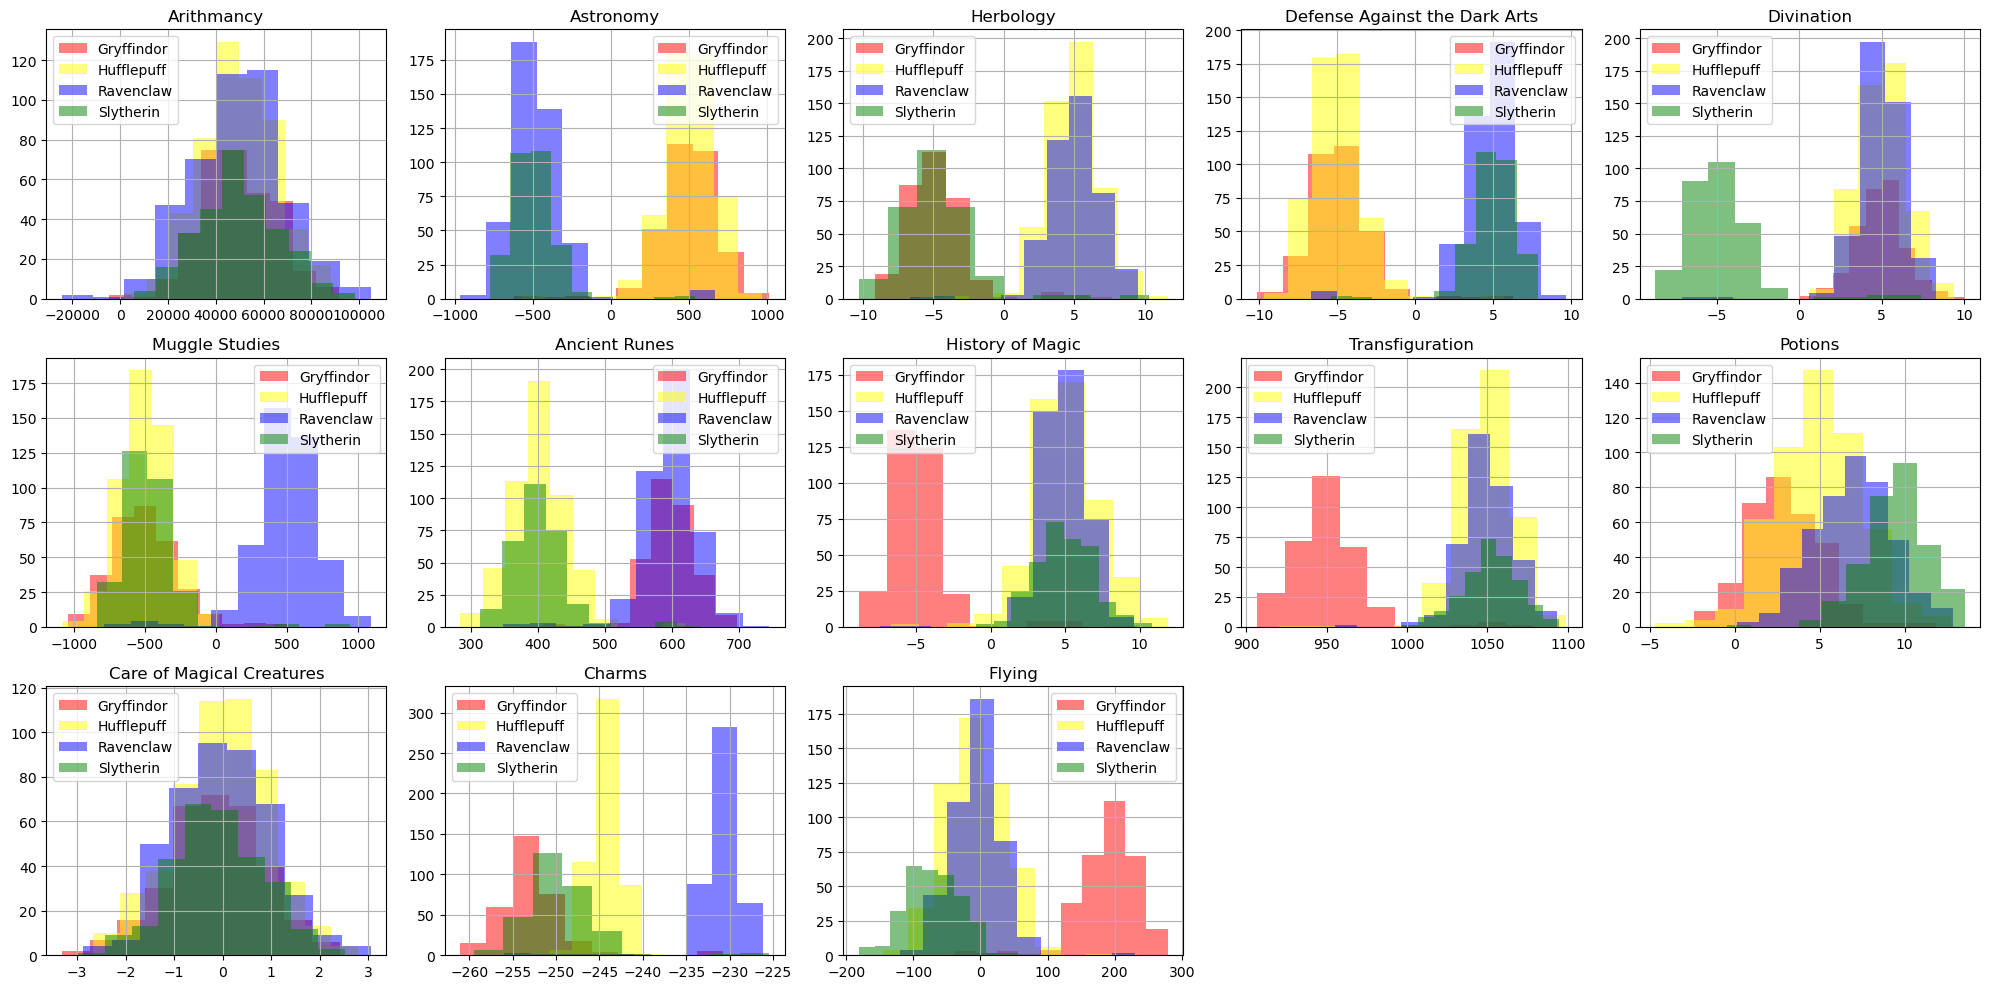

In [343]:
ft_hist(df)

In [344]:
def ft_scatter(df):
	index = 0
	fig = plt.figure(figsize=(30, 30))
	for i, feature_1 in enumerate(courses):
		for j, feature_2 in enumerate(courses):
			if feature_1 != feature_2:
				ax = plt.subplot(13, 13, i * 13 + j + 1)
				df.plot.scatter(x=feature_1, y=feature_2, c=df['Hogwarts House'].apply(lambda x: colors_dict[x]), ax=ax)
	plt.tight_layout()
	plt.show()

In [345]:
print(len(courses))
print(courses)

13
['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying']


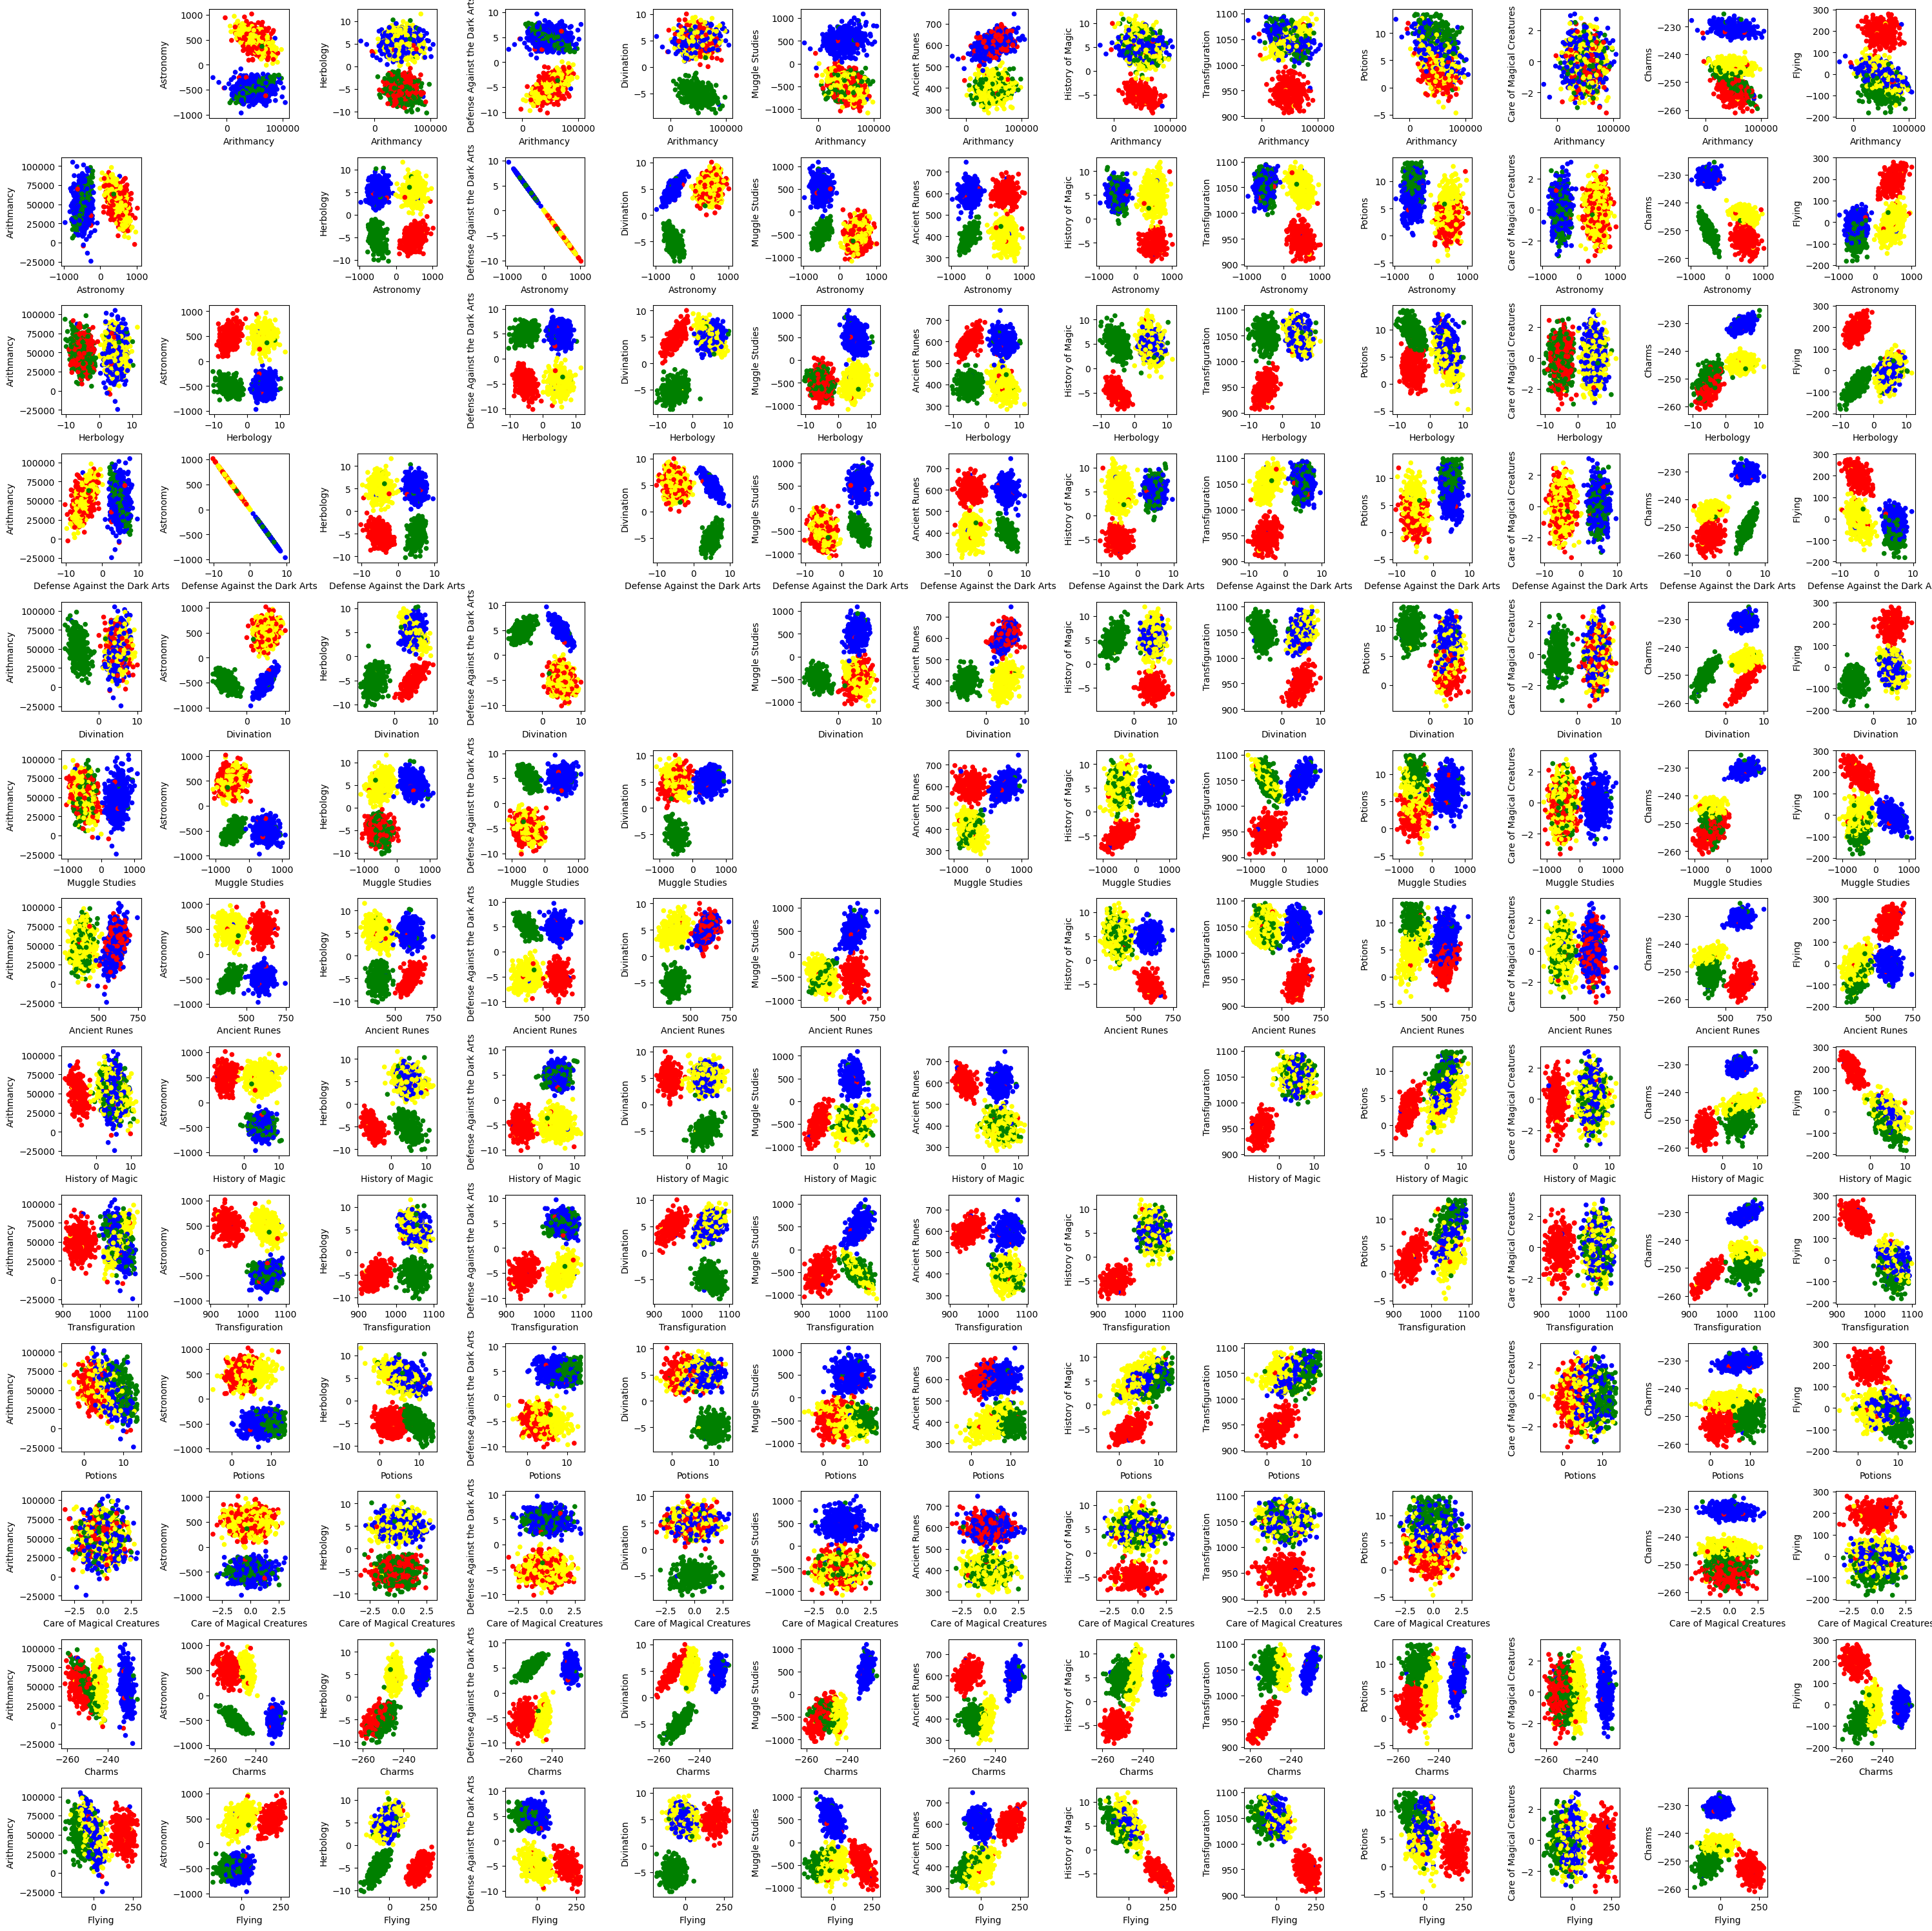

In [346]:
ft_scatter(df)

In [347]:
def ft_pair_plor(df):
	index = 0
	fig = plt.figure(figsize=(30, 30))
	for i, feature_1 in enumerate(courses):
		for j, feature_2 in enumerate(courses):
			if feature_1 != feature_2:
				ax = plt.subplot(13, 13, i * 13 + j + 1)
				df.plot.scatter(x=feature_1, y=feature_2, c=df['Hogwarts House'].apply(lambda x: colors_dict[x]), ax=ax)
			else:
				ax = plt.subplot(13, 13, i * 13 + j + 1)
				for house in hogwarts_House:
					df[df["Hogwarts House"] == house][feature_1].hist(alpha=0.5, label=house, color=colors_dict[house])
	plt.tight_layout()
	plt.show()

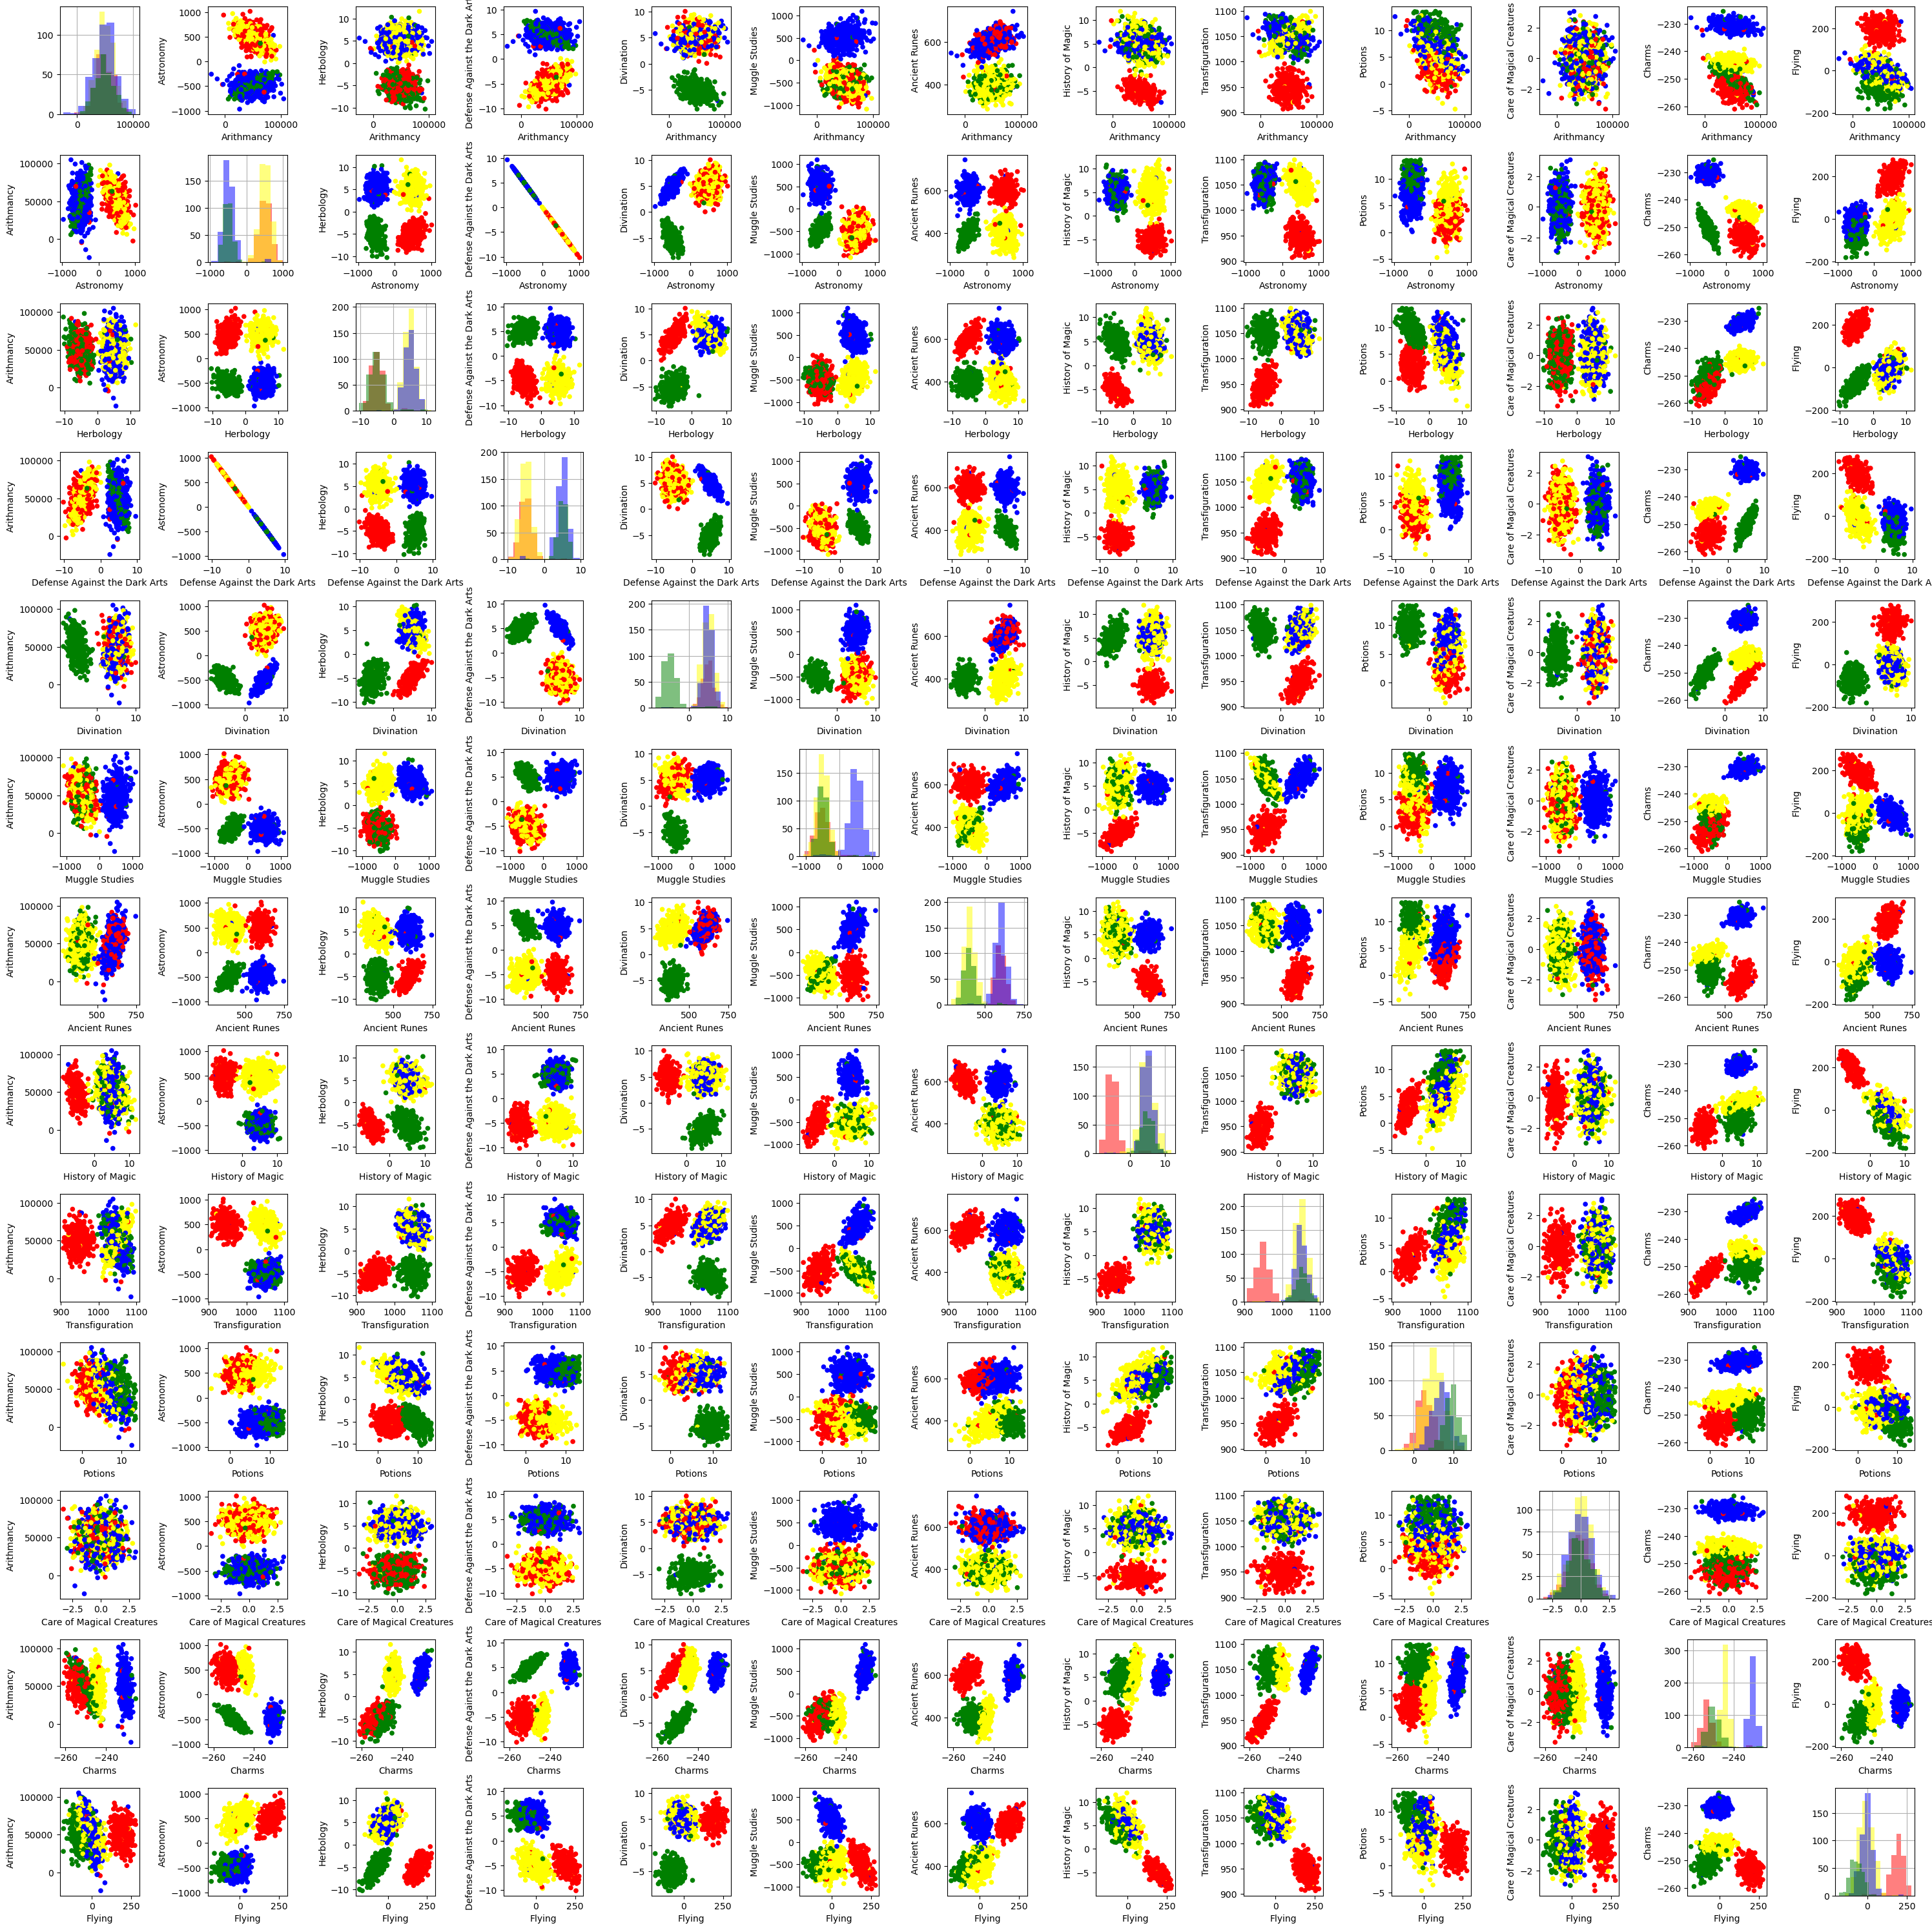

In [348]:
ft_pair_plor(df)

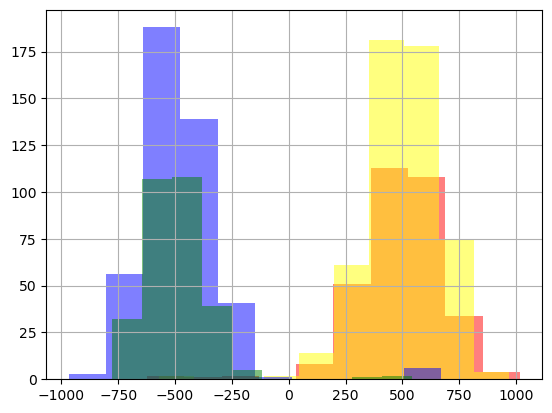

In [349]:
for house in hogwarts_House:
	df[df["Hogwarts House"] == house]["Astronomy"].hist(alpha=0.5, label=house, color=colors_dict[house])


In [350]:
# normalize the data for each course

for course in courses:
	df[course] = (df[course] - df[course].mean()) / df[course].std()

In [351]:
def get_KL_matrixes(df):
	kl_matrixes = {}
	for course in courses:
		slytherin_grades = df[df["Hogwarts House"] == "Slytherin"][course].dropna().to_numpy()
		ravenclaw_grades = df[df["Hogwarts House"] == "Ravenclaw"][course].dropna().to_numpy()
		gryffindor_grades = df[df["Hogwarts House"] == "Gryffindor"][course].dropna().to_numpy()
		hufflepuff_grades = df[df["Hogwarts House"] == "Hufflepuff"][course].dropna().to_numpy()

		kde1 = gaussian_kde(slytherin_grades)
		kde2 = gaussian_kde(ravenclaw_grades)
		kde3 = gaussian_kde(gryffindor_grades)
		kde4 = gaussian_kde(hufflepuff_grades)

		x_values = np.linspace(-1, 1, 1000)

		pdf1 = kde1(x_values)
		pdf2 = kde2(x_values)
		pdf3 = kde3(x_values)
		pdf4 = kde4(x_values)

		pdf1 /= pdf1.sum()
		pdf2 /= pdf2.sum()
		pdf3 /= pdf3.sum()
		pdf4 /= pdf4.sum()

		kl_matrix = pd.DataFrame(
			np.zeros((4, 4)),
			columns=["Slytherin", "Ravenclaw", "Gryffindor", "Hufflepuff"],
			index=["Slytherin", "Ravenclaw", "Gryffindor", "Hufflepuff"]
		)

		grades = [pdf1, pdf2, pdf3, pdf4]

		for i in range(4):
			for j in range(4):
				if i != j:
					kl_matrix.iloc[i, j] = entropy(grades[i], grades[j])  # KL Divergence
				else:
					kl_matrix.iloc[i, j] = 0

		kl_matrixes[course] = kl_matrix

	return kl_matrixes

In [352]:
kl_matrixes = get_KL_matrixes(df)
for course in courses:
	print(course)
	# print the mean value of the matrix
	print(kl_matrixes[course].mean().mean())

Arithmancy
0.00418192623390294
Astronomy
2.919614699687238
Herbology
2.2887489526362934
Defense Against the Dark Arts
2.91151253790975
Divination
0.4003294032616689
Muggle Studies
1.6325857995702737
Ancient Runes
2.301434566516673
History of Magic
0.5151349921225673
Transfiguration
0.7920679741739068
Potions
0.6933903498630728
Care of Magical Creatures
0.0038122206254116698
Charms
2.654620978131602
Flying
1.204691266690549


In [353]:
import pandas as pd

# Get matrix names
matrix_names = list(kl_matrixes.keys())

# Initialize a DataFrame to store the Frobenius norm results
frobenius_df = pd.DataFrame(index=matrix_names, columns=matrix_names)

# Compute Frobenius norm for each pair
for i, name1 in enumerate(matrix_names):
	for j, name2 in enumerate(matrix_names):
		frobenius_norm = np.linalg.norm(kl_matrixes[name1] - kl_matrixes[name2])
		frobenius_df.loc[name1, name2] = frobenius_norm

# Convert to numeric type
frobenius_df = frobenius_df.astype(float)

frobenius_df
# make a heatmap of the Frobenius norm
plt.figure(figsize=(10, 10))
sns.heatmap(frobenius_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Frobenius Norm between KL Divergence matrices")

NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

In [589]:
def logreg_train_house(df, house, features):
	y = (df["Hogwarts House"] == house).to_numpy(dtype=float)
	X = np.array([df[feature] for feature in features]).T
	X[np.isnan(X)] = 0
	
	print(y)
	print(X)
	print(X.shape)
	
	# weig
	

In [590]:
def logreg_train():
	# todo
    pass

In [591]:
logreg_train_house(df, "Hufflepuff", ["Herbology", "Divination"])

[0. 0. 0. ... 0. 1. 1.]
[[ 0.87862839  0.37737107]
 [-1.36568958 -2.10957278]
 [ 1.26137897  0.71862192]
 ...
 [-0.83228995  0.70057269]
 [ 0.44098689  0.86253449]
 [ 0.81997833  0.8276393 ]]
(1600, 2)


In [315]:
class LogisticRegression:
	def __init__(self, n_features, lr=0.01, epochs=1000):
		self.lr = lr
		self.epochs = epochs
		self.weights = np.random.rand(n_features + 1, 1)
		self.xmean = 0
		self.xstd = 1
		self.n_features = n_features

	def normalize(self, X):
		# self.xmean = X.mean()
		# self.xstd = X.std()
		# X = (X - self.xmean) / self.xstd
		return X

	def forward(self, X):
		# X : shape : (*, n_features)
		# W : shape : (n_features, out_features)
		return 1 / (1 + np.exp(-X @ self.weights))
	
	def loss(self, y, y_pred):
		return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()

	def backward(self, y_pred, y, X):
		grad = ((y_pred - y).reshape(-1, 1) * X).mean(axis=0)
		self.weights -= (self.lr * grad).reshape(-1, 1)

	def predict(self, X):
		# X = (X - self.xmean) / self.xstd
		X = np.insert(X, 0, 1, axis=1)
		return self.forward(X)

	def accuracy(self, y_pred, y):
		y_pred = y_pred.squeeze()
		y_pred = (y_pred > 0.5).astype(int)
		y = (y > 0.5).astype(int)
		print((y == y_pred).mean())

	def fit(self, X, y):
		X = self.normalize(X)
		# print(X[:10])
		X = np.insert(X, 0, 1, axis=1)
		for epoch in range(self.epochs):
			y_pred = self.forward(X)
			y_pred = y_pred.squeeze()
			self.backward(y_pred, y, X)
			# if epoch % 100 == 0:
				# print(f"Epoch : {epoch}, Loss: {self.loss(y, y_pred)}")
		y_pred = self.forward(X)
		y_pred = y_pred.squeeze()

In [316]:
def aggregate_predictions(models, Xs):
	"""
	Args:
		models: List of 4 models [gryffindor_model, hufflepuff_model, ravenclaw_model, slytherin_model]
		X: Features to predict on
	Returns:
		Array of predicted houses
	"""
	# Get predictions from all models - shape (n_samples, 4)
	predictions = np.column_stack([
		models["Gryffindor"].predict(Xs[0]),
		models["Hufflepuff"].predict(Xs[1]),
		models["Ravenclaw"].predict(Xs[2]),
		models["Slytherin"].predict(Xs[3])
	])
	
	# Get index of highest prediction for each sample
	house_idx = np.argmax(predictions, axis=1)
	
	# Convert indices to house names
	final_predictions = np.array([hogwarts_House[idx] for idx in house_idx])
	
	return final_predictions

Arithmancy
0.00418192623390294
Astronomy
2.919614699687238
Herbology
2.2887489526362934
Defense Against the Dark Arts
2.91151253790975
Divination
0.4003294032616689
Muggle Studies
1.6325857995702737
Ancient Runes
2.301434566516673
History of Magic
0.5151349921225673
Transfiguration
0.7920679741739068
Potions
0.6933903498630728
Care of Magical Creatures
0.0038122206254116698
Charms
2.654620978131602
Flying
1.204691266690549


In [ ]:
df_train = pd.read_csv('datasets/dataset_train.csv')
df_test = pd.read_csv('datasets/dataset_test.csv')
result = pd.read_csv('datasets/dataset_truth.csv')

courses = ["Arithmancy", "Astronomy", "Herbology", "Defense Against the Dark Arts", "Divination", "Muggle Studies", "Ancient Runes", "History of Magic", "Transfiguration", "Potions", "Care of Magical Creatures", "Charms", "Flying"]
hogwarts_House = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"]

for course in courses:
	df_train[course] = (df_train[course] - df_train[course].mean()) / df_train[course].std()
	df_test[course] = (df_test[course] - df_test[course].mean()) / df_test[course].std()

features_gryffindor = ["History of Magic", "Transfiguration", "Flying", "Defense Against the Dark Arts"]
features_hufflepuff = ["Defense Against the Dark Arts", "Transfiguration", "Astronomy", "Ancient Runes"] 
features_ravenclaw = ["Muggle Studies", "Charms", "Defense Against the Dark Arts"]
features_slytherin = ["Defense Against the Dark Arts", "Herbology", "Arithmancy", "Ancient Runes"]

features_list = [features_gryffindor, features_hufflepuff, features_ravenclaw, features_slytherin]
Xs_train = [np.array([df_train[feature] for feature in features]).T for features in features_list]
Xs_test = [np.array([df_test[feature] for feature in features]).T for features in features_list]

models = {}

for house, X_train, X_test in zip(hogwarts_House, Xs_train, Xs_test):
	# X = np.array([df[feature] for feature in features]).T
	X_train[np.isnan(X_train)] = 0
	X_test[np.isnan(X_test)] = 0

	y_train = (df_train["Hogwarts House"] == house).to_numpy(dtype=float)
	y_test = (result["Hogwarts House"] == house).to_numpy(dtype=float)

	model = LogisticRegression(n_features=X_train.shape[1], epochs=1000, lr=0.2)
	model.fit(X_train, y_train)
	models[house] = model

	y_pred = model.predict(X_train)
	model.accuracy(y_pred, y_train)

	y_pred = model.predict(X_test)
	model.accuracy(y_pred, y_test)

y_pred = aggregate_predictions(models, Xs_train)

print(f"train acc {np.round((df_train["Hogwarts House"].to_numpy() == y_pred).mean(), 3)}")

y_pred = aggregate_predictions(models, Xs_test)

print(f"test acc {np.round((result["Hogwarts House"].to_numpy() == y_pred).mean(), 3)}")


0.991875
0.9975
0.9875
0.995
0.988125
0.995
0.993125
0.9925
train acc 0.982
test acc 0.99


In [ ]:
target_house = "Hufflepuff"

df = pd.read_csv('datasets/dataset_train.csv')

courses = ["Arithmancy", "Astronomy", "Herbology", "Defense Against the Dark Arts", "Divination", "Muggle Studies", "Ancient Runes", "History of Magic", "Transfiguration", "Potions", "Care of Magical Creatures", "Charms", "Flying"]
hogwarts_House = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"]

for course in courses:
	df[course] = (df[course] - df[course].mean()) / df[course].std()

features = ["Defense Against the Dark Arts", "Transfiguration", "Astronomy", "Ancient Runes"]
# features = courses

X = np.array([df[feature] for feature in features]).T
X[np.isnan(X)] = 0

y = (df["Hogwarts House"] == target_house).to_numpy(dtype=float)
model = LogisticRegression(n_features=len(features), epochs=1000, lr=0.2)
model.fit(X, y)

# evaluate the model
y_pred = model.predict(X)
model.accuracy(y_pred, y)


(1600,) (1600,)
0.9875


In [ ]:
df = pd.read_csv('datasets/dataset_test.csv')
result = pd.read_csv('datasets/dataset_truth.csv')

courses = ["Arithmancy", "Astronomy", "Herbology", "Defense Against the Dark Arts", "Divination", "Muggle Studies", "Ancient Runes", "History of Magic", "Transfiguration", "Potions", "Care of Magical Creatures", "Charms", "Flying"]
hogwarts_House = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"]

for course in courses:
	df[course] = (df[course] - df[course].mean()) / df[course].std()

# features = ["Defense Against the Dark Arts", "Charms", "Herbology", "Divination", "Muggle Studies"]

X = np.array([df[feature] for feature in features]).T
X[np.isnan(X)] = 0

y = (result["Hogwarts House"] == target_house).to_numpy(dtype=float)

y_pred = model.predict(X)
model.accuracy(y_pred, y)


0.9925
